## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?

Answer: Yes, after looking at a visualization of the data and the measures of skewness and kurtosis, the distribution of body temperatures is normal. 

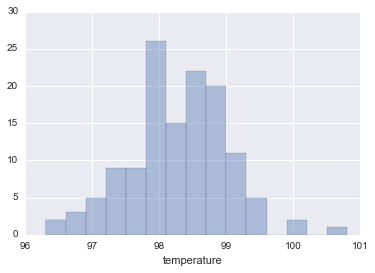

In [13]:
sns.distplot(df.temperature, bins=15, kde=False);

In [24]:
stats.anderson(df.temperature, dist='norm')

AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [30]:
stats.chisquare(df.temperature)

Power_divergenceResult(statistic=0.70580626976918936, pvalue=1.0)

In [31]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## 2. Is the true population mean really 98.6 degrees F?

Since it would be impossible to take everyone's temperature, we don't know what the true population mean actually is. The sample population mean temperature is 98.25 degrees F and the low p-value indicates strongly that 98.6 probably is not the true population mean.

In [8]:
df.temperature.mean()

98.24923076923078

In [9]:
df.temperature.std()

0.7331831580389454

In [10]:
tstat, pval = stats.ttest_1samp(df.temperature, 98.6)
print "t-statistic: ", tstat
print "p-value:", pval

t-statistic:  -5.45482329236
p-value: 2.41063204156e-07


## 3. At what temperature should we consider someone's temperature to be "abnormal"?

Outside of the range of the confidence interval of 98.12 and 98.38 degrees should be considered abnormal with a 95% level of confidence.

In [11]:
mvs = stats.bayes_mvs(df.temperature, alpha=.95)
conf_interval = mvs[0][1]
margin_of_error = df.temperature.mean() - conf_interval[0]
print "Confidence Interval:", conf_interval
print "Margin of Error:", margin_of_error

Confidence Interval: (98.122002905608014, 98.376458632853485)
Margin of Error: 0.127227863623


## 4. Is there a significant difference between males and females in normal temperature?

Yes, the difference between males and females in normal temperature is significant at a 95% confidence level.

In [12]:
male_temps = df.temperature[df.gender == 'M']
female_temps = df.temperature[df.gender == 'F']

male_var = df.temperature.var()
female_var = df.temperature.var()

t = stats.ttest_ind(male_temps, female_temps)
tstat = t[0]
pval = t[1]

print "Equal Variance?", male_var == female_var
print "t-statistic:", tstat
print "p-value:", pval

Equal Variance? True
t-statistic: -2.28543453817
p-value: 0.0239318831224
